# IMPORTANT

At the very begin of every python script, you will be able to find a **series of lines comented** (#) with written "**MY IDEA -->**". those lines explain the general idea I wanted to perform in order to get the result. In the script you will be also able to find in-lines comments.

*note:* whenever there is a question that needs to be discussed, you will be able to find the comment after the script in a cell similar to this one. 

#### Downloading the two datasets

In [ ]:
#!wget -P /content/drive/MyDrive/chatz https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json
#!wget -P /content/drive/MyDrive/chatz https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json

## RQ5

In [1]:
#here I import all the libraries I will need
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import math
import seaborn as sns
from datetime import datetime

### RQ5.1

Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

In [2]:
#open the first file and converting it into a dataframe
df_lighter_authors = pd.read_json("lighter_authors.json", lines = True)

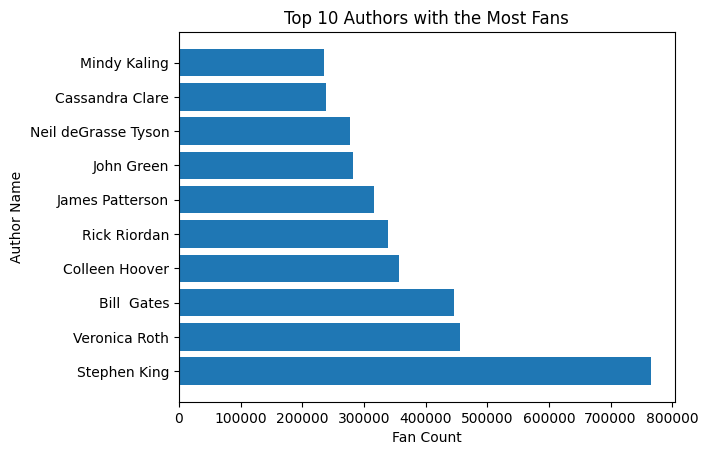

In [3]:
#MY IDEA: --> in order to plot the 10 most influential authors, I first need to retrieve their fans count and the number of books they published. Since the dataset is very large,
#I "filter" it by taking only the columns I need. Therefore, I will take: the name of the author, the number of fans and the list of books.
#To answer the question with the most influential author concering the fan numbers and book numbers, I need to order the authors. 
#In order to do so, I sort them by the number of fans and break the ties by the number of books.
#note: the total number of books is retrieved by inspecting the length of the list of all the books published.

#create the smaller dataframe 
df = pd.DataFrame({
    'Author Name': df_lighter_authors['name'],
    'Fan Count': df_lighter_authors['fans_count'],
    'List of Books': df_lighter_authors['book_ids']
})

#I count the len of the books and I report it as an integer value
df['Number of Books'] = df['List of Books'].apply(len)

#now I sort them by the number of fans and break the ties by the number of books
df = df.sort_values(by=["Fan Count", "Number of Books"], ascending=[False, False]).head(10)

# Create the plot
plt.barh(df["Author Name"], df["Fan Count"])
plt.xlabel("Fan Count")
plt.ylabel("Author Name")
plt.title("Top 10 Authors with the Most Fans")
plt.show()

#### Answer:
The most influential author is **Stephen King**.

*note: this result counts all books in all versions and languages. This is done on purpose as I need to understand the most influential so all versions of a book in different languages and publications are crucial in understanding how the author is known across the globe*

## RQ5.2

Have they published any series of books? If any, extract the longest series name among these authors.

*note: this question is **very unclear**. are we talking about the longes name of a series or the name of the series which is the longest? very unclear. I'll try to do both*

In [4]:
#MY IDEA --> now I need to inspect the lighter_books.json file but since the file is very very very (VERY) large, I can not open it as the other one, so i read it in chunks and then merge them. 
#Furthermore, in order to work better, for every passage I will need this file, I retain only the columns I need 
#(so the following code may appear again during the tasks with some variations according to my necessities).
#in this case I need to check if a writer has written a book series, so I will only need the column with their names and the columns related to the series.


#file
json_file_path = 'lighter_books.json'
#the columns I want
columns_to_read = ["author_name", "series_id","series_name","series_position"]
#chunk size 
chunk_size = 20000
#empty dataframe to store result
result_df = pd.DataFrame(columns=columns_to_read)
#read the file 
json_reader = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)

#for every chunk append the selected columns to the dataframe I created before to store the result 
for chunk in json_reader:
    chunk = chunk[columns_to_read]  
    result_df = pd.concat([result_df, chunk], ignore_index=True)

print(result_df.head())

    author_name series_id   series_name series_position
0  J.K. Rowling     45175  Harry Potter               5
1  J.K. Rowling     45175  Harry Potter               1
2  J.K. Rowling     45175  Harry Potter               2
3  J.K. Rowling     45175  Harry Potter               3
4  J.K. Rowling     45175  Harry Potter               4


In [5]:
#MY IDEA --> to check if an author has written a serie, I first write their name and check if in the column series_id there is at least one entry.
#If that is the case, it means that the author has written a series of book. If this is not the case and everything is NA, then they have not written a series of book.
#since the authors are only ten (1 of which is not an author) I will check them one by one. This may be slow and can be implemented by doing simultaneously but I have few time so
#I will proceed in this way for now and if I have time I will implement it (so you will not read this :) )

author_name_to_check = "Bill  Gates"
#filter the dataframe with their name
author_books = result_df[result_df['author_name'] == author_name_to_check]
#check for NA
has_written_series = not author_books['series_id'].isna().all()
#output for me
if has_written_series:
    print(f"{author_name_to_check} has written a series of books.")
else:
    print(f"{author_name_to_check} has not written a series of books.")

Bill  Gates has written a series of books.


In [6]:
#now I take all the authors and subset the dataframe using their names.
specific_authors = ["Stephen King", "Veronica Roth","Bill  Gates","Colleen Hoover", "Rick Riordan", "James Patterson", "John Green", "Neil deGrasse Tyson", "Cassandra Clare","Mindy Kaling"]
specific_authors_df = result_df[result_df['author_name'].isin(specific_authors)]

In [7]:
#MY IDEA --> THIS IS FOR FINDING THE LONGEST SERIES AS NUMBER OF BOOKS
#I take the maximum number for each author of the column series_position. This is because the column itself store the number 
#of a book of a specific serie ex: Harry potter the order of the phoenix will have 5 as a number. So I just need to retrieve the greatest to retrieve the longest one. 

specific_authors_df = specific_authors_df.drop_duplicates(subset=['series_name', 'series_position'])

max_series_positions = specific_authors_df.groupby('author_name')['series_position'].max()
print(max_series_positions)

author_name
Cassandra Clare               Sampler
Colleen Hoover                      3
James Patterson                     9
John Green                          2
Neil deGrasse Tyson                 2
Rick Riordan           companion book
Stephen King                       7C
Veronica Roth                       3
Name: series_position, dtype: object


### Answer (Partial?)

Sthepen King has written a series of books. Veronica Roth has written a series of books. Colleen Hoover has written a series of books. Rick Riordan has written a series of books. James Patterson has written a series of books. John Green has written a series of books. Neil deGrasse Tyson has written a series of books. Cassandra Clare has written a series of books, Mindy Caling has not written a series of books. Bill Gates has not written a serie of books..

The author with the longest book series is: **James Patterson**. The Book series is: **Alex Cross**

In [8]:
#MY IDEA --> THIS IS FOR FINDING THE LONGEST SERIES AS LONGEST NAME

longest_series_name = specific_authors_df['series_name'].str.len().idxmax()
longest_series_title = specific_authors_df.loc[longest_series_name, 'series_name']

print(longest_series_title)

Percy Jackson and the Olympians: The Graphic Novels


### Answer (partial?)

Sthepen King has written a series of books. Veronica Roth has written a series of books. Colleen Hoover has written a series of books. Rick Riordan has written a series of books. James Patterson has written a series of books. John Green has written a series of books. Neil deGrasse Tyson has written a series of books. Cassandra Clare has written a series of books, Mindy Caling has not written a series of books. Bill Gates has not written a serie of books.

The longest series in respect to the title is: Percy Jackson and the Olympians: The Graphic Novels

## RQ5.3

How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

In [9]:
#MY IDEA --> as I warned before, now you have the same code with slightly differences.
#this time I have to do exactly what I did before but selecting different columns; so I will retain the author, the book title and the format (what I am looking after)

json_file_path = 'lighter_books.json'
columns_to_read = ["author_name","format","title"]
chunk_size = 20000  
result_df = pd.DataFrame(columns=columns_to_read)
json_reader = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)
for chunk in json_reader:
    chunk = chunk[columns_to_read]  
    result_df = pd.concat([result_df, chunk], ignore_index=True)

print(result_df.head())

    author_name                 format  \
0  J.K. Rowling              Paperback   
1  J.K. Rowling              Hardcover   
2  J.K. Rowling              Hardcover   
3  J.K. Rowling  Mass Market Paperback   
4  J.K. Rowling              Paperback   

                                               title  
0  Harry Potter and the Order of the Phoenix (Har...  
1  Harry Potter and the Sorcerer's Stone (Harry P...  
2  Harry Potter and the Chamber of Secrets (Harry...  
3  Harry Potter and the Prisoner of Azkaban (Harr...  
4  Harry Potter and the Goblet of Fire (Harry Pot...  


In [10]:
#MY IDEA --> now I have to check the format type, so for each author I see the format type by selecting only one time to see in which way they have been ever published.

#I check the different types of format for each publisher
author_names = ["Stephen King", "Veronica Roth", "Bill  Gates","Colleen Hoover", "Rick Riordan", "James Patterson", "John Green", "Neil deGrasse Tyson", "Cassandra Clare","Mindy Kaling"]
all_formats_df = pd.DataFrame(columns=['Author Name', 'Formats Published'])

#check for each author
for author_name in author_names:
    #filter the dataframe for the author 
    author_df = result_df[result_df['author_name'] == author_name]
    #group by author
    grouped = author_df.groupby('author_name')
    #group by format 
    formats_published = grouped['format'].unique().reset_index()
    formats_published.columns = ['Author Name', 'Formats Published']

    all_formats_df = pd.concat([all_formats_df, formats_published])


all_formats_df = all_formats_df.reset_index(drop=True)
#result
print(all_formats_df)

           Author Name                                  Formats Published
0         Stephen King  [Mass Market Paperback, Paperback, , Hardcover...
1        Veronica Roth  [Hardcover, , Trade Paperback, Paperback, eboo...
2          Bill  Gates  [, Paperback, Audio CD, Hardcover, Mass Market...
3       Colleen Hoover  [ebook, Paperback, Kindle Edition, , Audiobook...
4         Rick Riordan  [Hardcover, Paperback, Audio CD, Library Bindi...
5      James Patterson  [Paperback, Mass Market Paperback, , Hardcover...
6           John Green  [Hardcover, Paperback, Audio CD, Flexcover, eb...
7  Neil deGrasse Tyson  [Paperback, Hardcover, Audio CD, Audiobook, Au...
8      Cassandra Clare  [Hardcover, Audio CD, Paperback, Audiobook, Ki...
9         Mindy Kaling  [Paperback, Hardcover, Audio CD, , ebook, Audi...


c:\Users\stefa\anaconda3\envs\example\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21109 (\N{CJK UNIFIED IDEOGRAPH-5275}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\stefa\anaconda3\envs\example\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\stefa\anaconda3\envs\example\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\stefa\anaconda3\envs\example\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\stefa\anaconda3\envs\example\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6

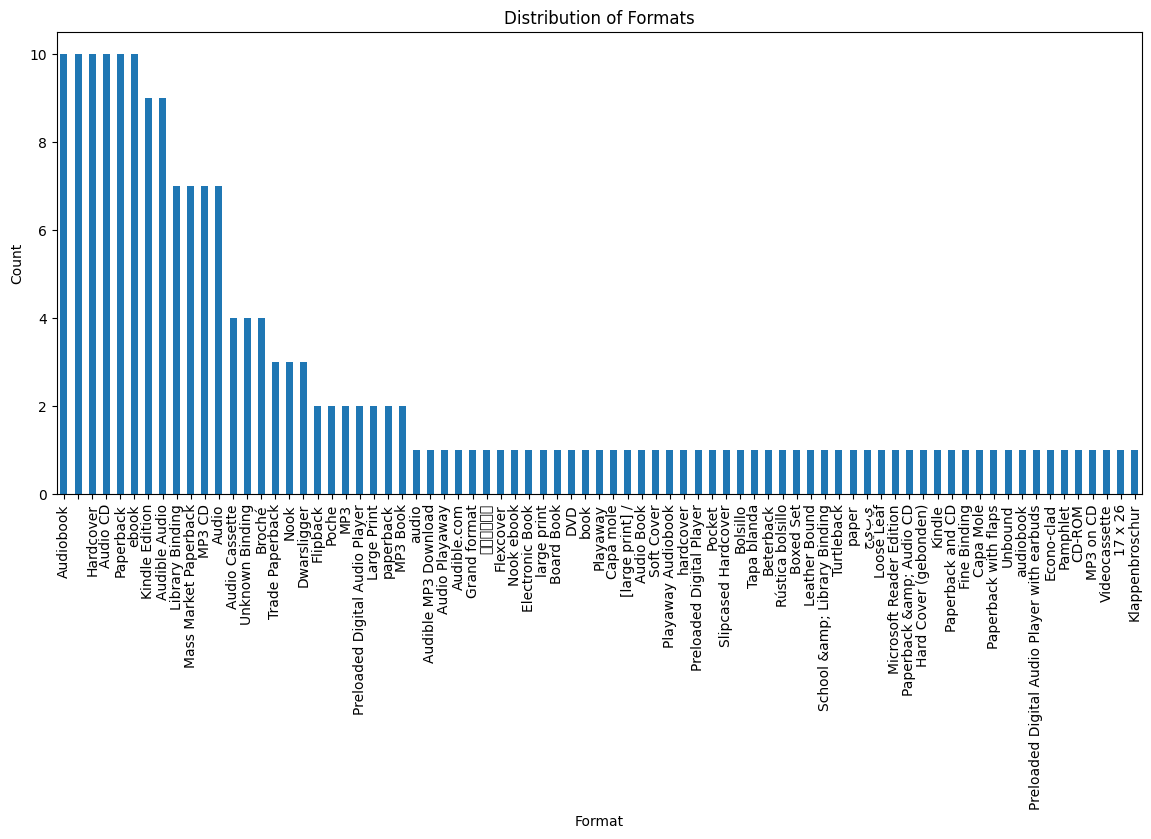

In [11]:
#MY IDEA --> after having the result, I want to investigate how many times a type of format has been used (always related to those authors)

formats_series = all_formats_df['Formats Published'].explode()
#count the occurrences of each format
format_counts = formats_series.value_counts()

#plot
plt.figure(figsize=(14, 6))
format_counts.plot(kind='bar')
plt.title('Distribution of Formats')
plt.xlabel('Format')
plt.ylabel('Count')
plt.show()


### Answer

As we can see from the plot, Audiobook, Kindle edition, Hardcover, Audio CD, Paperback, ebook, audible audio are the most used formats by these authors. Yet, we can see that there is a misentry in the database. For example we can see that Audiobook, Aubible audio, Audio CD, MP3, MP3 Book, ausio, Audio Book are all different categories in the dataframe but refer all in the same category. So there has been a poor classification when creating the dataset. 

### RQ5.4

Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” 

In [12]:
#MY IDEA --> now I need again the ligher_authors.json file and convert it to a panda dataframe. 
#then I take the columns I need and I create a dataframe with only the authors I need. Then I can proceed with a general response from readers.

df_lighter_authors

df = pd.DataFrame({
    'Author Name': df_lighter_authors['name'],
    'Fan Count': df_lighter_authors['fans_count'],
    'Number of Books': df_lighter_authors['book_ids'],
    'Average rating': df_lighter_authors['average_rating'],
    'Works Id': df_lighter_authors["work_ids"],
    "Gender": df_lighter_authors["gender"],
    "reviews": df_lighter_authors["ratings_count"]
})


specific_authors = ["Stephen King", "Veronica Roth", "Bill  Gates","Colleen Hoover", "Rick Riordan", "James Patterson", "John Green", "Neil deGrasse Tyson", "Cassandra Clare","Mindy Kaling"]

specific_authors_df = df[df["Author Name"].isin(specific_authors)]

print(specific_authors_df)

                Author Name  Fan Count  \
1017           Stephen King     766035   
1161        James Patterson     317040   
3818    Neil deGrasse Tyson     277850   
4537           Rick Riordan     339346   
6397            Bill  Gates     446876   
27110       Cassandra Clare     238560   
32358          Mindy Kaling     234647   
100166           John Green     282537   
169374        Veronica Roth     455358   
205870       Colleen Hoover     356633   

                                          Number of Books  Average rating  \
1017    [11588, 830502, 149267, 10614, 10592, 43615, 1...            4.04   
1161    [13145, 13148, 13137, 13152, 7494, 13139, 1313...            3.98   
3818    [32191710, 20663770, 20663771, 20707975, 20663...            4.07   
4537    [28187, 2120932, 28186, 4556058, 561456, 77361...            4.32   
6397    [36603020, 39731947, 41619, 1081637, 41814307,...            3.85   
27110   [256683, 3777732, 1582996, 7171637, 6752378, 1...            4.24  

col_0   Gender Count
Gender              
                   4
female             3
male               3


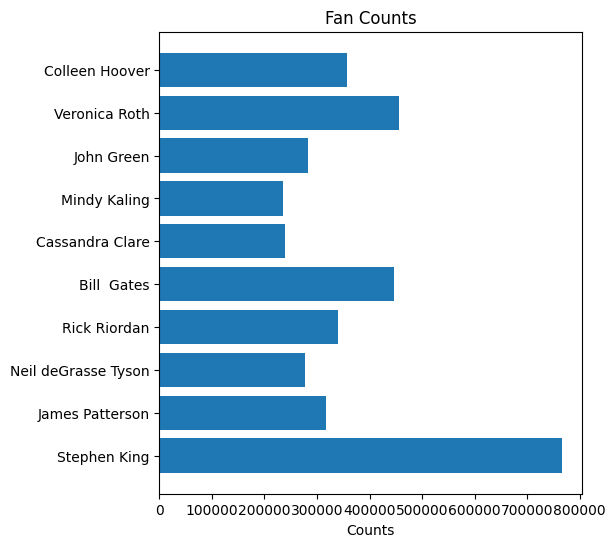

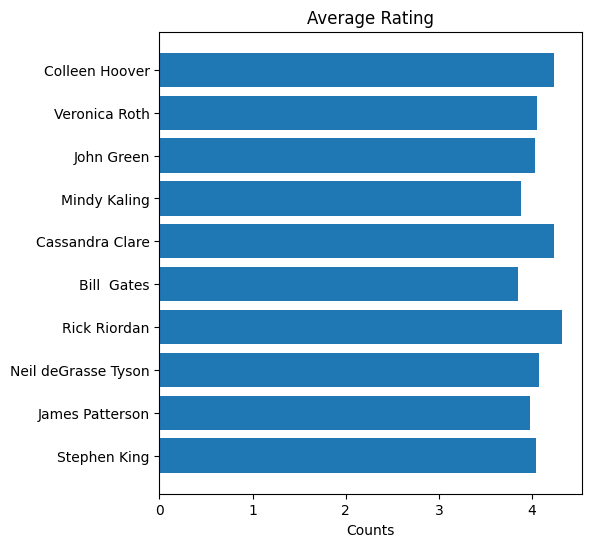

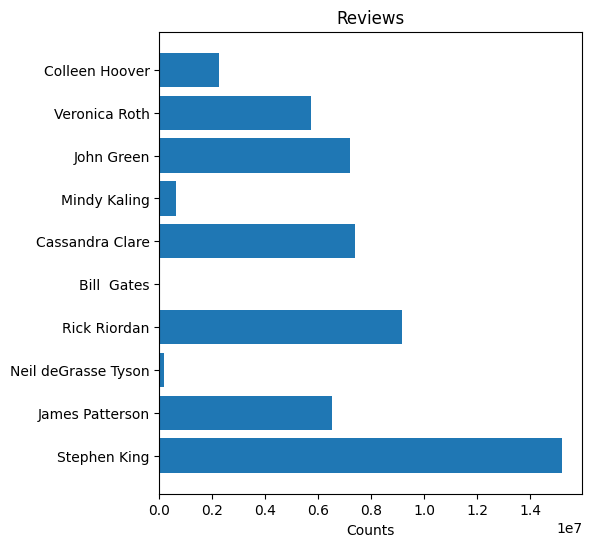

In [13]:
#Fan Counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(specific_authors_df['Author Name'], specific_authors_df['Fan Count'])
plt.xlabel('Counts')
plt.title('Fan Counts')

#average ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(specific_authors_df['Author Name'], specific_authors_df['Average rating'])
plt.xlabel('Counts')
plt.title('Average Rating')

#number of reviews
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(specific_authors_df['Author Name'], specific_authors_df['reviews'])
plt.xlabel('Counts')
plt.title('Reviews')

#Gender division
gender_table = pd.crosstab(index=specific_authors_df['Gender'], columns='Count')
# Rename the 'Count' column to 'Gender Count'
gender_table = gender_table.rename(columns={'Count': 'Gender Count'})
# Display the gender frequency table
print(gender_table)

In [14]:
#MY IDEA --> now I want to investigate the statistics

gender_groups = specific_authors_df.groupby('Gender')
avg_rating_stats = gender_groups['Average rating'].describe()
print(avg_rating_stats)
avg_rating_means = gender_groups['Average rating'].mean()
print(avg_rating_means)

avg_rating_stats = gender_groups['reviews'].describe()
print(avg_rating_stats)
avg_rating_means = gender_groups['reviews'].mean()
print(avg_rating_means)

avg_rating_stats = gender_groups['Fan Count'].describe()
print(avg_rating_stats)
avg_rating_means = gender_groups['Fan Count'].mean()
print(avg_rating_means)

        count      mean       std   min     25%    50%   75%   max
Gender                                                            
          4.0  3.957500  0.108743  3.85  3.8725  3.955  4.04  4.07
female    3.0  4.176667  0.109697  4.05  4.1450  4.240  4.24  4.24
male      3.0  4.113333  0.181475  3.98  4.0100  4.040  4.18  4.32
Gender
          3.957500
female    4.176667
male      4.113333
Name: Average rating, dtype: float64
        count          mean           std        min        25%        50%  \
Gender                                                                       
          4.0  1.995562e+06  3.469960e+06     9418.0   133766.5   393130.5   
female    3.0  5.126751e+06  2.634922e+06  2239503.0  3989409.5  5739316.0   
male      3.0  1.028479e+07  4.451435e+06  6514711.0  7829400.0  9144089.0   

               75%         max  
Gender                          
         2254926.0   7186569.0  
female   6570375.5   7401435.0  
male    12169834.0  15195579.0  
Gender
 

### Answer
when exploring the data according to gender, we can see that there is a balance in  **Average Rating** between male and female authors. yet, when analising **Rewiews** and **Fan Counts** there is a massive unbalance between genders. Male authors have more reviews and fan counts even thoug having the same average rating comparing to the female colleagues.
Still, there are two authors who miss classification in gender.

# RQ6

For this question, consider the top 10 authors concerning the number of fans again.

                Author Name  Fan Count  \
1017           Stephen King     766035   
169374        Veronica Roth     455358   
6397            Bill  Gates     446876   
205870       Colleen Hoover     356633   
4537           Rick Riordan     339346   
1161        James Patterson     317040   
100166           John Green     282537   
3818    Neil deGrasse Tyson     277850   
27110       Cassandra Clare     238560   
32358          Mindy Kaling     234647   

                                          Number of Books  
1017    [11588, 830502, 149267, 10614, 10592, 43615, 1...  
169374  [13335037, 11735983, 18710190, 18126198, 13615...  
6397    [36603020, 39731947, 41619, 1081637, 41814307,...  
205870  [15717943, 27362503, 30333938, 17788401, 24445...  
4537    [28187, 2120932, 28186, 4556058, 561456, 77361...  
1161    [13145, 13148, 13137, 13152, 7494, 13139, 1313...  
100166  [11870085, 99561, 6442769, 49750, 35504431, 65...  
3818    [32191710, 20663770, 20663771, 20707975, 20663...

Text(0.5, 1.0, 'Top 10 Authors with fans')

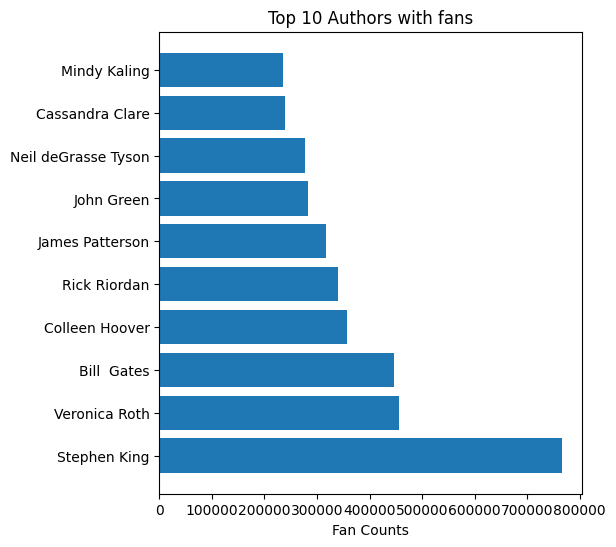

In [15]:
#MY IDEA --> take the top 10 authors with the most fans for both files.

df = pd.DataFrame({
    'Author Name': df_lighter_authors['name'],
    'Fan Count': df_lighter_authors['fans_count'],
    'Number of Books': df_lighter_authors['book_ids']
})

# Sort the DataFrame by 'Influence Score' in descending order
sorted_df = df.sort_values(by='Fan Count', ascending=False)
# Select the top 10 authors
top_10_authors = sorted_df.head(10)
# Print the top 10 influential authors
print(top_10_authors[['Author Name', 'Fan Count', 'Number of Books']])

# Plot the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_10_authors['Author Name'], top_10_authors['Fan Count'])
plt.xlabel('Fan Counts')
plt.title('Top 10 Authors with fans')

### RQ6.1 

Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

In [16]:
#MY IDEA --> import the dataset with only the columns I need. some of them will be needed later for other tasks 

json_file_path = 'lighter_books.json'
columns_to_read = ["author_name","publication_date","original_publication_date","series_name","series_position","title","average_rating","num_pages","language","format"]
chunk_size = 20000  
result_df = pd.DataFrame(columns=columns_to_read)
json_reader = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)
for chunk in json_reader:
    chunk = chunk[columns_to_read]  
    result_df = pd.concat([result_df, chunk ], ignore_index=True)

print(result_df.head())

    author_name publication_date original_publication_date   series_name  \
0  J.K. Rowling          2004-09                2003-06-21  Harry Potter   
1  J.K. Rowling       2003-11-01                1997-06-26  Harry Potter   
2  J.K. Rowling       2003-11-01                1998-07-02  Harry Potter   
3  J.K. Rowling       2004-05-01                1999-07-08  Harry Potter   
4  J.K. Rowling       2002-09-28                2000-07-08  Harry Potter   

  series_position                                              title  \
0               5  Harry Potter and the Order of the Phoenix (Har...   
1               1  Harry Potter and the Sorcerer's Stone (Harry P...   
2               2  Harry Potter and the Chamber of Secrets (Harry...   
3               3  Harry Potter and the Prisoner of Azkaban (Harr...   
4               4  Harry Potter and the Goblet of Fire (Harry Pot...   

   average_rating num_pages language                 format  
0            4.50       870      eng            

In [17]:
#MY IDEA --> take only the books written by these authors. 

df = pd.DataFrame({
    'Original Publication': result_df["original_publication_date"],
    'Author Name': result_df["author_name"],
    'Series Name': result_df["series_name"],
    "Serie Position": result_df["series_position"],
    "Title": result_df["title"],
    "Average Rating":result_df["average_rating"],
    "Pages":result_df["num_pages"],
    "Language":result_df["language"],
    "Format": result_df["format"]
})

specific_authors = ["Stephen King", "Veronica Roth","Bill  Gates" ,"Colleen Hoover", "Rick Riordan", "James Patterson", "John Green", "Neil deGrasse Tyson", "Cassandra Clare","Mindy Kaling"]

books_df = df[df["Author Name"].isin(specific_authors)]

print(books_df)

        Original Publication      Author Name  \
3114              2003-11-04     Stephen King   
3178              2004-09-21     Stephen King   
3179                    2002     Stephen King   
3180              2004-06-08     Stephen King   
3181                 1987-05     Stephen King   
...                      ...              ...   
7025403           2013-09-16  James Patterson   
7025474           1977-01-28     Stephen King   
7025621           2012-10-02     Rick Riordan   
7026344           2015-03-17  Cassandra Clare   
7026879           2011-06-09  James Patterson   

                                 Series Name Serie Position  \
3114                          The Dark Tower              5   
3178                          The Dark Tower              7   
3179                          The Dark Tower            1-4   
3180                          The Dark Tower              6   
3181                          The Dark Tower              2   
...                              

In [19]:
###MY IDEA --> now I filter the data such that the books with a negative number of pages or equal to zero are eliminated. 
#I also remove all the different languages versions of a book

books_df['Pages'] = pd.to_numeric(books_df['Pages'], errors='coerce')

#remove 0 and negative
books_df = books_df[books_df['Pages'] > 0]

#take only english books, so that I remove all other version of the book
books_df = books_df[books_df['Language'] == "eng"]

In [20]:
#mY IDEA --> make the dataframe such that there are only books that belong to a series. drop all the others. 
#then I need to clean the dataset by taking only ONE book per series per each position
#since I retained the original publication date, I do not care which I retain, the only thing that I care is that the date is specific and not only a year.
#at the very end, I remove all series that consists of just one book (therefore are not a series since it is only one book)


#removes all NA and empty values --> so I have only series books.
filtered_df = books_df[books_df['Series Name'].notna() | (books_df['Series Name'] != '')]

#drop all rows with "-" in the column series name (--> I'm doing so beacuse I want to remove some variables that have as value 1-4 or 1-6...)
filtered_df = filtered_df[filtered_df['Serie Position'].str.contains('-') == False]

#drop all rows that do not have two "- -". I am doing this because I am removing all dates that do not consist of year, month,day.
filtered_df = filtered_df[filtered_df['Original Publication'].str.count('-') == 2]


#now, since a lot (A LOT!) of my rows are composed by different publication of the same book, I just need one for each book for each series as I will use the 
#original publication date, which is equal for all the books, even for a different publication
filtered_df = filtered_df.drop_duplicates(subset=['Series Name', 'Serie Position'])

#remove all rows with the name of a series that compares only one time
counts = filtered_df['Series Name'].value_counts()
unique_series_names = counts[counts == 1].index
filtered_df = filtered_df[filtered_df['Series Name'].isin(unique_series_names) == False]

#now I have my clean dataframe :)
filtered_df

,Original Publication,Author Name,Series Name,Serie Position,Title,Average Rating,Pages,Language,Format
3114,2003-11-04,Stephen King,The Dark Tower,5,"Wolves of the Calla (The Dark Tower, #5)",4.16,931.0,eng,Mass Market Paperback
3178,2004-09-21,Stephen King,The Dark Tower,7,"The Dark Tower (The Dark Tower, #7)",4.24,1050.0,eng,Paperback
3180,2004-06-08,Stephen King,The Dark Tower,6,"Song of Susannah (The Dark Tower, #6)",3.97,544.0,eng,Mass Market Paperback
3183,1997-11-04,Stephen King,The Dark Tower,4,"Wizard and Glass (The Dark Tower, #4)",4.23,845.0,eng,Paperback
3185,1982-06-01,Stephen King,The Dark Tower,1,"The Gunslinger (The Dark Tower, #1)",3.94,238.0,eng,Paperback
...,...,...,...,...,...,...,...,...,...
6800793,2015-11-23,James Patterson,Alex Cross,23,"Cross Justice (Alex Cross, # 23)",4.23,420.0,eng,Hardcover
6800795,2015-01-15,James Patterson,I Funny,3,I Totally Funniest: A Middle School Story: (I ...,4.38,336.0,eng,Paperback
6953146,2016-03-14,James Patterson,Private,10,"Private Paris (Private, #10)",3.86,141.0,eng,Hardcover
6964407,2015-04-24,James Patterson,Middle School,7.25,Middle School: Rafe's Aussie Adventure (Middle...,4.30,320.0,eng,Paperback


In [21]:
#MY IDEA --> now I have to print the average time between a publication. to do so, I need to make the original publication column into a datetime format. 
#then I sort it by series name and position so that I can calculate the difference between two subsequent publications for each series.
#then I take the average for each series

#eliminate all those books in which the series position is 0.5, 1.4 ecc
filtered_df = filtered_df[filtered_df['Serie Position'].str.isnumeric()]

#convert "Original Publication" column in a datetime format.
filtered_df['Original Publication'] = pd.to_datetime(filtered_df['Original Publication'])

#sort 
filtered_df = filtered_df.sort_values(by=['Series Name', 'Serie Position'])

#for each series, calculate the time difference between two subsequent publications
filtered_df['Time Gap'] = filtered_df.groupby('Series Name')['Original Publication'].diff()

#average
average_time_gap = filtered_df.groupby('Series Name')['Time Gap'].mean()

print(average_time_gap)


Series Name
Alex Cross                                  177 days 13:05:27.272727272
Confessions                                           464 days 16:00:00
Daniel X                                              556 days 04:48:00
Daniel X: The Manga                                   289 days 00:00:00
Divergent                                             455 days 12:00:00
Honeymoon                                            3052 days 00:00:00
Hopeless                                              203 days 00:00:00
I Funny                                               555 days 00:00:00
Maximum Ride                                          462 days 09:00:00
Maximum Ride: The Manga                               424 days 12:00:00
Maybe                                                               NaT
Michael Bennett                             442 days 20:34:17.142857144
Middle School                                         544 days 08:00:00
NYPD Red                                            

C:\Users\stefa\AppData\Local\Temp\ipykernel_12420\42724353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Original Publication'] = pd.to_datetime(filtered_df['Original Publication'])


In [22]:
print(average_time_gap.mean())

855 days 00:52:07.174364112


### COMMENT

I did not understand the meaning of the question itself. I did not understand if I need to return the average gap time between books belonging to the same serie of books or the average gap time between all books belonging to a serie. Anyways, I provided both. The general time is 855 days.

If the time to return was the one for books belonging to the same series, then we have different times for each series. most of the publications are around one year, which is something reasonable. Few of them are above one year with some up to 8 years. This may be strange but in my opinion it is normal, just take as esample the times JRR Martin is taking for publishing a "Game of Thrones" book. 

There are some publications that have an average time very short (coupple of month or less) but inspecting them, they are all graphic novels, Mangas, short stories...
Yet, there is something that I would have not expect, there are few publications with time between 100 days and 355. Personally I find it strange to publish a book in few months or less than a year.

In [23]:
### MY IDEA --> now I have to do the inverse, so I remove all books belonging to a serie, I clean the dataset by removing outliers in the date format, drop dublicates
#caused by the publishing again of the same book and then I proceed in couning the average time

books_df
filtered_df = books_df[books_df['Series Name'].notna() & (books_df['Series Name'] == '')]

#drop all rows that do not have two "- -". I am doing this because I am removing all dates that do not consist of year, month,day.
filtered_df = filtered_df[filtered_df['Original Publication'].str.count('-') == 2]

#there are 3 data ouliers with different time format, so I drop them.
date_pattern = r'^\d{4}-\d{2}-\d{2}$'
filtered_df = filtered_df[filtered_df['Original Publication'].str.match(date_pattern)]

#now, since a lot (A LOT!) of my rows are composed by different publication of the same book, I just need to take one of them.
#So I drop duplicates and keep only one and see its original date
filtered_df = filtered_df.drop_duplicates(subset=['Title'])


#now I have my clean dataframe :)
filtered_df = filtered_df.drop('Serie Position', axis=1)
filtered_df = filtered_df.drop('Series Name', axis=1)
filtered_df

,Original Publication,Author Name,Title,Average Rating,Pages,Language,Format
3416,1978-10-03,Stephen King,The Stand,4.34,1344.0,eng,Hardcover
3425,1975-10-17,Stephen King,'Salem's Lot,4.25,594.0,eng,Hardcover
3535,1980-05-01,James Patterson,Cradle and All,3.86,384.0,eng,Paperback
4682,2002-06-10,James Patterson,The Beach House,3.85,356.0,eng,Paperback
6607,2006-10-24,Stephen King,Lisey's Story,3.68,513.0,eng,Hardcover
...,...,...,...,...,...,...,...
6504774,2015-11-03,Stephen King,The Bazaar of Bad Dreams,3.92,495.0,eng,Hardcover
6555083,2006-09-21,John Green,The Abundance of Katherines,3.57,215.0,eng,Paperback
6555457,2014-12-02,Stephen King,Vertigo Essentials: American Vampire #1,3.88,64.0,eng,Kindle Edition
6767963,2015-06-30,Stephen King,Drunken Fireworks,3.53,2.0,eng,Audiobook


In [24]:
### MY IDEA --> now I do again what I did before with the calculations

filtered_df['Original Publication'] = pd.to_datetime(filtered_df['Original Publication'])

# Sort the DataFrame by the "Original Publication" date
general_date_df = filtered_df.sort_values(by='Original Publication')

# Calculate the time gap between subsequent publications
general_date_df['Time Gap'] = general_date_df['Original Publication'].diff()

# Compute the average time gap
average_time_gap = general_date_df['Time Gap'].mean()

print(average_time_gap)

84 days 02:17:08.571428571


In [25]:
#MY IDEA --> here instead, I do what I did for the series, bur instead of doing it by series, I am doing it by authors

# Convert the "Original Publication" column to datetime
filtered_df['Original Publication'] = pd.to_datetime(filtered_df['Original Publication'])

# Sort the DataFrame by the "Original Publication" date
author_date_df = filtered_df.sort_values(by='Original Publication')

# Calculate the time gap between subsequent publications
author_date_df['Time Gap'] = author_date_df.groupby('Author Name')['Original Publication'].diff()

# Compute the average time gap by author
average_time_gap_by_author = author_date_df.groupby('Author Name')['Time Gap'].mean()

print(average_time_gap_by_author)

Author Name
Bill  Gates                    1196 days 00:00:00
Cassandra Clare                               NaT
Colleen Hoover                  231 days 00:00:00
James Patterson       282 days 21:03:40.408163264
John Green                      306 days 22:24:00
Mindy Kaling                   1332 days 08:00:00
Neil deGrasse Tyson             733 days 00:00:00
Rick Riordan                   4128 days 00:00:00
Stephen King          148 days 21:24:42.352941176
Veronica Roth                   357 days 00:00:00
Name: Time Gap, dtype: timedelta64[ns]


### Comment

As before, I did not understand well the question. So I do not know if I have to return the average between all books or all books given an author. Nevertheless, here we have both results. The average overall average time (84 days) is something very unusual but can be explained because we are taking into considerations several authors who publish books often.
As before,  most of the authors have a "human" time of publications, but three (Stephen King, James Patterson, Colleen Hoover) have time very short. In particular, Stephen King has the shortest time between publications.

### RQ6.2

For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [26]:
###MY IDEA --> Now I clean the dataset again by dropping all books with the same result and by dropping all books with an incorrect date format 
#I drop all books with dame title and for the series, I drop all books that have the same series name and the same series position.
#in order to do so, I will do it in two separate dataframes and then I will merge them
#then, I drop all books with the same original publication. I do this because if they have the same original publication,
#then it is the same book in a different version. I can do this because I only have 10 authors so it is very unlikely that they published a book in the same year, month ,day.

books_df

filtered_df = books_df.drop_duplicates(subset=['Title'])

#there are about 800 books with wrong datetime, I drop them
date_pattern = r'^\d{4}-\d{2}-\d{2}$'
filtered_df = filtered_df[filtered_df['Original Publication'].str.match(date_pattern)]

#filter by position removing outliers
filtered_df = filtered_df[filtered_df['Serie Position'].str.contains('-') == False]

#final filtering
filtered_df = filtered_df.drop_duplicates(subset=['Original Publication'])

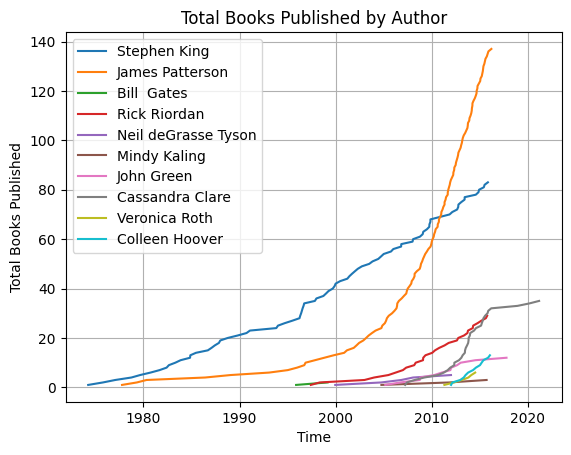

In [27]:
#MY IDEA --> I transform the date and sort the result; then I group for each author, their books.

#convert date
filtered_df['Original Publication'] = pd.to_datetime(filtered_df['Original Publication'])

#sort
filtered_df = filtered_df.sort_values(by='Original Publication')

#count
filtered_df['Books Published'] = filtered_df.groupby('Author Name')['Original Publication'].cumcount() + 1

#plot
authors = filtered_df['Author Name'].unique()
for author in authors:
    author_df = filtered_df[filtered_df['Author Name'] == author]
    plt.plot(author_df['Original Publication'], author_df['Books Published'], label=author)

plt.xlabel('Time')
plt.ylabel('Total Books Published')
plt.title('Total Books Published by Author')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Comment

The authors are more or less all contemporary to each other expect for Stephen King and James Patterson. These two are contemporary to the others in the sense that they still publish books when the other started publishing but as we can see, King and Patterson started way before the others but continued to publish while the other started.